# Reaction Kinetics with Optical Rotation

**NOTE: This version of the workbook has code for more formal plots.**

This notebook will present plots of first order kinetics using optical rotation.

The data being plotted is from Figure 2 in “Neighboring Carbon and Hydrogen. XI. Solvolysis of exo-Norbornyl p-Bromobenzenesulfonate.” S. Winstein, D. Trifan , *J. Am. Chem. Soc.*, **1952**, *74*, 1154–1160. https://doi.org/10.1021/ja01125a007

The data was digitized using WebPlotDigitizer



## Setup Tools and Read Data Table

Here the data table is read in and processed. Also the libraries are imported and any functions defined

In [ ]:
### SETUP

#!pip install uncertainties
#!pip install lmfit
#!mkdir plots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.optimize import curve_fit

import uncertainties as un
from uncertainties import unumpy as unp

import lmfit

github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Winstein/"
github_location = ""
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"



## Read Data

Read the data in from the csv text file.

In [2]:
### READ DATA
# datafiles are "WinsteinData_AcetoneWater.csv" and 
# "WinsteinData_AcOH.csv" and "WinsteinData_EtOH.csv"

data_file = "WinsteinData_AcOH.csv"

df = pd.read_csv(github_location + data_file, 
             delimiter = ",", 
             skipinitialspace=True, 
 #            index_col="pH", 
             comment = "#") 

print(df)



    time/1e-3 seconds  log alpha
0            0.057377  -0.582645
1            0.357923  -0.615702
2            0.740437  -0.739669
3            1.177596  -0.785124
4            1.642077  -0.871901
5            2.147541  -1.024793
6            2.407104  -1.004132
7            2.762295  -1.111570
8            3.827869  -1.227273
9            5.426230  -1.508264
10           6.177596  -1.772727
11           6.505464  -1.665289


## Plot Data

This code will quickly plot the data. We idenify the columns we want to use for $x$ and $y$ and then call the plot function.

0     0.261430
1     0.242269
2     0.182109
3     0.164012
4     0.134307
5     0.094451
6     0.099053
7     0.077345
8     0.059255
9     0.031027
10    0.016876
11    0.021613
Name: log alpha, dtype: float64
k_obs = 0.000433+/-0.000018
y0 = 0.269+/-0.006


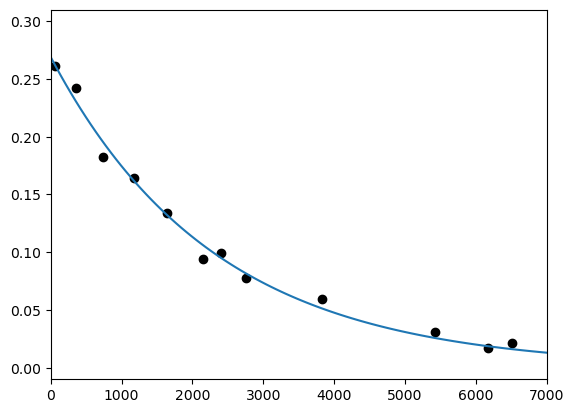

In [47]:
plt.rcdefaults()

x = df["time/1e-3 seconds"] * 1000 # convert to seconds
y = 10 ** df["log alpha"]
print(y)
y0 = y[0]

#y = y / y0 # normalize

plt.plot(x,y, "ko")

def line1(x, int):
    ### slope set to -1. We are fitting only for the intercept.
    y = x * -1 + int
    return y


def model(t, k):
    y = 1 * np.exp(-k * t)
    return y

def model2(t, y0, k):
    y = y0 * np.exp(-k * t)
    return y

   

popt,pcov = curve_fit(model2, x, y,
                      p0 = (1, 1E-4),
                      bounds=([0,0],[np.inf,np.inf])
                      )

y0, k_obs = un.correlated_values(popt,pcov)
print(f"k_obs = {k_obs}")
print(f"y0 = {y0}")



x1 = np.linspace(0,7000,100)
y1 = model2(x1, *popt)

plt.xlim(0,7000)
plt.ylim(-0.010,0.31)
plt.plot(x1, y1)


In [37]:
### Using LMFIT


# Create a model by loading the function via the lmfit.Model tool
mod = lmfit.Model(model2)  

# Set parameters - here i also set minimims so that no negative values are encountered in the fit
pars = mod.make_params(k = dict(value = 1E-4, min=0),
                       y0 = dict(value = 1, min=0), 
                      )



# use the .fit method on the model object to perform the curve fit
result = mod.fit(y, pars, t=x)   
display(result)
print(result.ci_report())



       99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 y0:  -0.02321  -0.01349  -0.00625   0.26897  +0.00631  +0.01376  +0.02402
 k :  -0.00007  -0.00004  -0.00002   0.00043  +0.00002  +0.00004  +0.00008


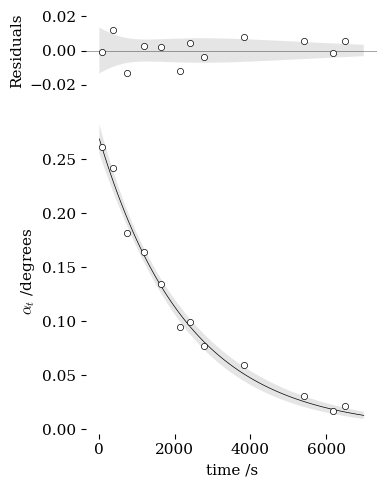

[[Model]]
    Model(model2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 22
    # data points      = 12
    # variables        = 2
    chi-square         = 6.2092e-04
    reduced chi-square = 6.2092e-05
    Akaike info crit   = -114.430608
    Bayesian info crit = -113.460795
    R-squared          = 0.99177803
[[Variables]]
    y0:  0.26897411 +/- 0.00591848 (2.20%) (init = 1)
    k:   4.3263e-04 +/- 1.8052e-05 (4.17%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(y0, k) = +0.6731


In [46]:
###############################################################################
### FANCY PLOT OF RESULT
###############################################################################

x1 = np.linspace(0,7000,100)
y1 = result.eval(t = x1)
dely = result.eval_uncertainty(t = x1, sigma=2)   # 95% confidence band


size2 = 4,5
###############################################################################
######################
### Plots - NEW STYLED PLOTTING SECTION
######################

plt.rcdefaults()

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=size2, height_ratios=[1, 4])  

# Settings for plot
ax[1].set(
#          title = Title,       
          ylabel=r"$\alpha_t$ /degrees",                
          xlabel=r"time /s", 
#          xlim=[0, np.max(x) + np.max(x) * 0.1],                  
#          ylim=[None,None]
#          xticks = [1,3,5,7],
#          yticks = [0,-1,-2,-3],
       )

### Data graphics
ax[1].scatter(x, y, marker = "o", s = 20, 
              color = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 

# Plot the curve fit line
ax[1].plot(x1,unp.nominal_values(y1), 
           marker = None, color = "black", 
           linewidth=0.5, zorder = 0)

# Confidence band
fit_up = y1 + dely
fit_dn = y1 - dely
ax[1].fill_between(x1, fit_up, fit_dn, 
                   facecolor="black", alpha=0.1, zorder = 2,
                   label="confidence interval")

######################
### Plot the residuals
######################

# difference between data and line-fit
residuals = -result.residual     

ax[0].set(
#          title = Title,       
          ylabel=r"Residuals", 
          xlabel=r"",                
#          xlim=[0, np.max(x) + np.max(x) * 0.1],                  
          ylim=[-np.max(residuals)*2,np.max(residuals)*2]
       )
### Data graphics
ax[0].scatter(x, residuals, marker = "o", s = 20, 
              color = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 3)
# make filled band
ax[0].fill_between(x1, dely, -dely, 
                   facecolor="black", alpha=0.1, zorder = 1,
                   linewidth = 0, label="confidence interval")

### Other elements
ax[0].axhline(0, color='gray', linewidth=0.5, zorder = 0) 
ax[0].set_xticks([])

################################################
### Output Plot
################################################

name = "opticaldataplot"

# Plot as .pdf
plt.savefig(f"{name}.pdf")

### Set face of plot to transparent
ax[0].patch.set_facecolor([0, 0, 0, 0])  
ax[1].patch.set_facecolor([0, 0, 0, 0])  

# Plot as .png with transparent background
plt.savefig(f"{name}.png", dpi=600, 
            facecolor = [0, 0, 0, 0],
        )
# display plot in notebook
plt.show()
print(result.fit_report())


[347.65 323.15] [1.54e-04 8.16e-06] [2.e-06 6.e-08]
---------- FIT REPORT ------------
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 2
    # variables        = 2
    chi-square         = 2.5216e-25
    reduced chi-square = 2.5216e-25
    Akaike info crit   = -110.665754
    Bayesian info crit = -113.279460
    R-squared          = 1.00000000
[[Variables]]
    m: -13135.5622 +/- 3.4364e-11 (0.00%) (init = -1000)
    b:  23.1541153 +/- 1.0457e-13 (0.00%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(m, b) = -0.9995
RSQ = 1.000

      _BEST_
 m:-13135.56223
 b:  23.15412
------THERMODYNAMIC PARAMETERS----------
The change in enthalpy is 109215.14+/-0.00 J/mole 23.15411531713171+/-0.00000000000010
The change in entropy is -5.04+/-0.00 J/mole.K -13135.562231406398+/-0.000000000034

-------- CHECK FIT ----------
calculate k at T=298 K is (2.436+/-0.000)e-07
[298.15 306.85] [8.79e-0

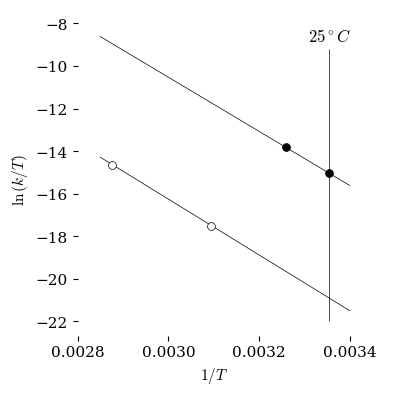

In [115]:
## EYRING PLOT
# 

import scipy.constants
size = [4,4]

sigma = 2


######################
### Experimental data with error
######################

temp_endo = np.array([74.5, 50.0]) + 273.15       # list of temperatures
k_obs_endo = np.array([15.4, 0.816]) * 1e-5  # list of observe rate constants (s^-1)
k_obs_err_endo= np.array([0.2 , 0.006]) * 1e-5  # list of standard deviations for data

temp_exo = np.array([25.0, 33.7]) + 273.15      # list of temperatures
k_obs_exo = np.array([8.79, 30.4]) * 1e-5 # list of observe rate constants (s^-1)
k_obs_err_exo= np.array([0.09 , 0.1]) * 1e-5  # list of standard deviations for data


temp = temp_endo
k_obs = k_obs_endo
k_obs_err = k_obs_err_endo

print(temp, k_obs, k_obs_err)

### Convert lists to numpy arrays (enables numpy math tools with these lists)
k_obs = unp.uarray(k_obs, k_obs_err)   # make an array of ufloat values

### Calculations for Erying plot axes
x = 1/(temp)  # convert temperature to Kelvin and then to 1/T
y_u = unp.log(k_obs/temp)   # y_u is now an array of ufloats

y = unp.nominal_values(y_u) # extract arrays of nominal values and errors
y_err = unp.std_devs(y_u)   # because curve_fit can handle ufloats

######################
###  Linear function to be used by curve_fit
######################
def linear(x, m, b):
    y = m * x + b
    return y

### Use curve_fit function  

# load the function f as the model to be fit
mod = lmfit.Model(linear)       

# state the parameters (use the text strings that we used above in the 
#   function) initial values are also set here
pars = mod.make_params(m=-1000, b=0  )     
                                            
# use the .fit method on the model object to perform the curve fit
result = mod.fit(y, pars, x=x, weights=1.0/y_err)   




print("---------- FIT REPORT ------------")
print(result.fit_report())

r,p = scipy.stats.pearsonr(x,y); rsq = r**2
print(f"RSQ = {rsq:0.3f}")
print()

#print("--- PARAMETER CONFIDENCE INTERVALS ----")
print(result.ci_report())
#print()

intercept = result.uvars['b']      # collect parameters as uncertain values 
slope = result.uvars['m']

temp_test = 298
R = scipy.constants.R
kb = scipy.constants.k
h = scipy.constants.h
kappa = 1

dH = -slope * R
dS = (intercept - unp.log(kb/h)) * R

print("------THERMODYNAMIC PARAMETERS----------")
print(f"The change in enthalpy is {dH:0.2f} J/mole {intercept}")
print(f"The change in entropy is {dS:0.2f} J/mole.K {slope}")
print()

## calculate k from Erying plot parameters.
kobs = (kappa * kb / h) * temp_test * unp.exp(-dH/(R*temp_test)) * unp.exp(dS/R)
print("-------- CHECK FIT ----------")
print(f"calculate k at T={temp_test} K is {kobs:0.4g}")


#################################################################

plt.rcdefaults()
style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(figsize = size)

ax.scatter(x, y, linewidths=0.5, marker="o", s=32, facecolors="white",
        edgecolors="black", zorder=3
)

max_x = 0.0034
min_x = 0.00285
x_fit = np.linspace(min_x, max_x, 100)  # x values for the fit line
y_fit = result.eval(x=x_fit)  # evaluate the fit line at these x values
ax.plot(x_fit, y_fit, linewidth=0.5, color="black", zorder=2)
        
##################################
### Second Exo Plot
##################################

temp = temp_exo
k_obs = k_obs_exo
k_obs_err = k_obs_err_exo

print(temp, k_obs, k_obs_err)

### Convert lists to numpy arrays (enables numpy math tools with these lists)
k_obs = unp.uarray(k_obs, k_obs_err)   # make an array of ufloat values

### Calculations for Erying plot axes
x = 1/(temp)  # convert temperature to Kelvin and then to 1/T
y_u = unp.log(k_obs/temp)   # y_u is now an array of ufloats

y = unp.nominal_values(y_u) # extract arrays of nominal values and errors
y_err = unp.std_devs(y_u)   # because curve_fit can handle ufloats

######################

### Use curve_fit function  

# load the function f as the model to be fit
mod = lmfit.Model(linear)       

# state the parameters (use the text strings that we used above in the 
#   function) initial values are also set here
pars = mod.make_params(m=-1000, b=0  )     
                                            
# use the .fit method on the model object to perform the curve fit
result = mod.fit(y, pars, x=x, weights=1.0/y_err)   




print("---------- FIT REPORT ------------")
print(result.fit_report())

r,p = scipy.stats.pearsonr(x,y); rsq = r**2
print(f"RSQ = {rsq:0.3f}")
print()

#print("--- PARAMETER CONFIDENCE INTERVALS ----")
print(result.ci_report())
#print()

intercept = result.uvars['b']      # collect parameters as uncertain values 
slope = result.uvars['m']

temp_test = 298
R = scipy.constants.R
kb = scipy.constants.k
h = scipy.constants.h
kappa = 1

dH = -slope * R
dS = (intercept - unp.log(kb/h)) * R

print("------THERMODYNAMIC PARAMETERS----------")
print(f"The change in enthalpy is {dH:0.2f} J/mole {intercept}")
print(f"The change in entropy is {dS:0.2f} J/mole.K {slope}")
print()

## calculate k from Erying plot parameters.
kobs = (kappa * kb / h) * temp_test * unp.exp(-dH/(R*temp_test)) * unp.exp(dS/R)
print("-------- CHECK FIT ----------")
print(f"calculate k at T={temp_test} K is {kobs:0.4g}")


#################################################################

ax.scatter(x, y, linewidths=0.5, marker="o", s=32, facecolors="black",
        edgecolors="black", zorder=3
)

y_fit = result.eval(x=x_fit)  # evaluate the fit line at these x values
ax.plot(x_fit, y_fit, linewidth=0.5, color="black", zorder=2)


ax.set(xlabel = r"$1/T$",
       ylabel = r"$\ln \left( k/T \right)$"
)

ax.set_xticks([0.0028,0.0030,0.0032,0.0034])  # These will be the ticks for both axes
ax.set_xlim([0.0028, max_x])

ax.vlines(1/298.15, -22, -9.2, color='black', linewidth=0.5, zorder=1)
ax.text(1/298.15, -9, r"$25 ^\circ C$", 
        horizontalalignment='center', verticalalignment='bottom', 
        color='black', fontsize=12, zorder=1
)
##################################





### do not show legend 
fig.legend([])
plt.legend([])      # blank legend

plt.savefig("eyring.pdf")
plt.show()


In [ ]:
import scipy.constants

scipy.constants.

0.017453292519943295